<a href="https://colab.research.google.com/github/noelivander/BD-2/blob/main/prepare_data_IndonesiaGelap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

israel = pd.read_csv('israel.csv')
print(israel.head())

   conversation_id_str                      created_at  favorite_count  \
0  1910756271206048093  Fri Apr 11 18:06:09 +0000 2025               0   
1  1910099896021205294  Fri Apr 11 18:06:02 +0000 2025               0   
2  1910755655411020229  Fri Apr 11 18:03:43 +0000 2025               1   
3  1910642782844101112  Fri Apr 11 18:03:41 +0000 2025               0   
4  1910655653015875961  Fri Apr 11 18:02:07 +0000 2025               0   

                                           full_text               id_str  \
0                                 Shabbat Shallom!!!  1910756271206048093   
1  @elpoghu Tumbal bergulir : setelah Ukraina gil...  1910756238478176398   
2  Duniya Bhar ki Khabrein | Iran Russia Gaza Isr...  1910755655411020229   
3  @LoverZksync @tanyarlfes Emang mereka itu bara...  1910755649094635660   
4  @AhmadSahidah @ramaArsy1 @kfc Sama saja selama...  1910755253118779833   

  image_url in_reply_to_screen_name lang location  quote_count  reply_count  \
0       NaN  

 ___
 Menggunakan library pandas untuk membaca data dari file CSV bernama "Gaza.csv" dan menyimpannya ke dalam variabel Gaza dalam bentuk DataFrame. Kemudian, kode mencetak lima baris pertama dari data tersebut menggunakan Gaza.head() agar pengguna bisa melihat cuplikan awal isi dan struktur tabel secara ringkas.

In [2]:
israel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   conversation_id_str      213 non-null    int64 
 1   created_at               213 non-null    object
 2   favorite_count           213 non-null    int64 
 3   full_text                213 non-null    object
 4   id_str                   213 non-null    int64 
 5   image_url                27 non-null     object
 6   in_reply_to_screen_name  140 non-null    object
 7   lang                     213 non-null    object
 8   location                 105 non-null    object
 9   quote_count              213 non-null    int64 
 10  reply_count              213 non-null    int64 
 11  retweet_count            213 non-null    int64 
 12  tweet_url                213 non-null    object
 13  user_id_str              213 non-null    int64 
 14  username                 213 non-null    o

___
Menampilkan informasi ringkas tentang DataFrame Gaza, seperti jumlah baris, jumlah kolom, nama kolom, tipe data setiap kolom, jumlah data non-null (tidak kosong), dan penggunaan memori. Ini berguna untuk memahami struktur data dan mengecek apakah ada data yang hilang (missing values).

**Tahapan Cleaning Data**

Menampilkan isi kolom full_text yang berisi tentang beberapa komentar-komentar masyarakat

In [3]:
israel["full_text"]

,full_text
0,Shabbat Shallom!!!
1,@elpoghu Tumbal bergulir : setelah Ukraina gil...
2,Duniya Bhar ki Khabrein | Iran Russia Gaza Isr...
3,@LoverZksync @tanyarlfes Emang mereka itu bara...
4,@AhmadSahidah @ramaArsy1 @kfc Sama saja selama...
...,...
208,Kalo beneran peduli tawarkan hal ini sejak awa...
209,@awesomeposted Yg lbh kejam lg smpe skrg tuh p...
210,@iamrejaaa @tanyarlfes Ya lu pikir sendiri lah...
211,tengok muka orang israel depan2 ni nampak la m...


Fungsi cleaning untuk membersihkan simbol-simbol yang tidak penting atau tidak digunakan

In [4]:
#membuat function cleaning

import re
def clean(s):
    s = s.replace(r'<lb>', "\n")
    s = s.replace(r'<tab>', "\i")
    s = re.sub(r'<br */*>', "\n", s)
    s = s.replace("&lt;", "<").replace("&gt;", ">").replace("&amp;", "&")
    s = s.replace("&amp;", "&")
    # markdown urls
    s = re.sub(r'\(https*://[^\)]*\)', "", s)
    # normal urls
    s = re.sub(r'https*://[^\s]*', "", s)
    s = re.sub(r'_+', ' ', s)
    s = re.sub(r'"+', '"', s)
    return str(s)

Menyimpan hasilnya didalam sebuah variabel yang baru

In [5]:
israel["text_clean"] = ''

In [6]:
for i, row in israel.iterrows():
    israel.at[i, "text_clean"] = clean(row.full_text)

Menampilkan 5 data yang berada dibagian atas

In [7]:
israel.head()

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username,text_clean
0,1910756271206048093,Fri Apr 11 18:06:09 +0000 2025,0,Shabbat Shallom!!!,1910756271206048093,NaN,NaN,in,NaN,0,0,0,https://x.com/onyx_247/status/1910756271206048093,328221214,onyx_247,Shabbat Shallom!!!
1,1910099896021205294,Fri Apr 11 18:06:02 +0000 2025,0,@elpoghu Tumbal bergulir : setelah Ukraina gil...,1910756238478176398,NaN,elpoghu,in,Moscow,0,0,0,https://x.com/yo2thok/status/1910756238478176398,497234852,yo2thok,@elpoghu Tumbal bergulir : setelah Ukraina gil...
2,1910755655411020229,Fri Apr 11 18:03:43 +0000 2025,1,Duniya Bhar ki Khabrein | Iran Russia Gaza Isr...,1910755655411020229,NaN,NaN,in,NaN,0,0,0,https://x.com/sk54sk/status/1910755655411020229,372298753,sk54sk,Duniya Bhar ki Khabrein | Iran Russia Gaza Isr...
3,1910642782844101112,Fri Apr 11 18:03:41 +0000 2025,0,@LoverZksync @tanyarlfes Emang mereka itu bara...,1910755649094635660,NaN,LoverZksync,in,NaN,0,0,0,https://x.com/sapujag22085972/status/191075564...,1325994733575888897,sapujag22085972,@LoverZksync @tanyarlfes Emang mereka itu bara...
4,1910655653015875961,Fri Apr 11 18:02:07 +0000 2025,0,@AhmadSahidah @ramaArsy1 @kfc Sama saja selama...,1910755253118779833,NaN,AhmadSahidah,in,NaN,0,0,0,https://x.com/4ndikris/status/1910755253118779833,818823147134717953,4ndikris,@AhmadSahidah @ramaArsy1 @kfc Sama saja selama...


Membandingkan data sesudah dan sebelum di clean

In [8]:
israel[["full_text", "text_clean"]].head()

,full_text,text_clean
0,Shabbat Shallom!!!,Shabbat Shallom!!!
1,@elpoghu Tumbal bergulir : setelah Ukraina gil...,@elpoghu Tumbal bergulir : setelah Ukraina gil...
2,Duniya Bhar ki Khabrein | Iran Russia Gaza Isr...,Duniya Bhar ki Khabrein | Iran Russia Gaza Isr...
3,@LoverZksync @tanyarlfes Emang mereka itu bara...,@LoverZksync @tanyarlfes Emang mereka itu bara...
4,@AhmadSahidah @ramaArsy1 @kfc Sama saja selama...,@AhmadSahidah @ramaArsy1 @kfc Sama saja selama...


Natural Language ToolKit Process

**Natural Languge Toolkit**

In [9]:
pip install nltk

Mendownload dataset

In [10]:
#tokenisasi
import nltk
nltk.download('punkt_tab')
from nltk.tokenize import sent_tokenize,word_tokenize

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Melakukan proses tokenisasi dalam bahasa "english"

In [11]:
example_text = "Hello there, how are you doing today? The weather is great today. The sky is blue. python is awsome"
print(sent_tokenize(example_text))
print(word_tokenize(example_text))

['Hello there, how are you doing today?', 'The weather is great today.', 'The sky is blue.', 'python is awsome']
['Hello', 'there', ',', 'how', 'are', 'you', 'doing', 'today', '?', 'The', 'weather', 'is', 'great', 'today', '.', 'The', 'sky', 'is', 'blue', '.', 'python', 'is', 'awsome']


melakukan tokenisasi (memecah teks menjadi kata-kata) pada kolom 'text_clean' di DataFrame Gaza. Proses ini dilakukan dengan fungsi word_tokenize, yang diterapkan ke setiap baris menggunakan .apply(). Hasil tokenisasi disimpan di kolom baru bernama 'tokenized_text'. Kemudian, kode menampilkan beberapa baris pertama dari kolom 'text_clean' dan 'tokenized_text' untuk melihat hasil pemecahan teks menjadi kata-kata.

In [12]:
# Tokenisasi kata pada kolom 'text_clean'
israel['tokenized_text'] = israel['text_clean'].apply(lambda x: word_tokenize(x))

# Menampilkan beberapa baris pertama data dengan kolom tokenized_text
print(israel[['text_clean', 'tokenized_text']].head())


                                          text_clean  \
0                                 Shabbat Shallom!!!   
1  @elpoghu Tumbal bergulir : setelah Ukraina gil...   
2  Duniya Bhar ki Khabrein | Iran Russia Gaza Isr...   
3  @LoverZksync @tanyarlfes Emang mereka itu bara...   
4  @AhmadSahidah @ramaArsy1 @kfc Sama saja selama...   

                                      tokenized_text  
0                        [Shabbat, Shallom, !, !, !]  
1  [@, elpoghu, Tumbal, bergulir, :, setelah, Ukr...  
2  [Duniya, Bhar, ki, Khabrein, |, Iran, Russia, ...  
3  [@, LoverZksync, @, tanyarlfes, Emang, mereka,...  
4  [@, AhmadSahidah, @, ramaArsy1, @, kfc, Sama, ...  


Mencoba menampilkan 5 data teratas setelah di tokenisasi

In [13]:
israel["tokenized_text"].head()

,tokenized_text
0,"[Shabbat, Shallom, !, !, !]"
1,"[@, elpoghu, Tumbal, bergulir, :, setelah, Ukr..."
2,"[Duniya, Bhar, ki, Khabrein, |, Iran, Russia, ..."
3,"[@, LoverZksync, @, tanyarlfes, Emang, mereka,..."
4,"[@, AhmadSahidah, @, ramaArsy1, @, kfc, Sama, ..."


Mengimport stopwords yang ada dalam bahasa "indonesia"

In [14]:
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words_indonesia = stopwords.words('indonesian')

stop_words_indonesia

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['ada',
 'adalah',
 'adanya',
 'adapun',
 'agak',
 'agaknya',
 'agar',
 'akan',
 'akankah',
 'akhir',
 'akhiri',
 'akhirnya',
 'aku',
 'akulah',
 'amat',
 'amatlah',
 'anda',
 'andalah',
 'antar',
 'antara',
 'antaranya',
 'apa',
 'apaan',
 'apabila',
 'apakah',
 'apalagi',
 'apatah',
 'artinya',
 'asal',
 'asalkan',
 'atas',
 'atau',
 'ataukah',
 'ataupun',
 'awal',
 'awalnya',
 'bagai',
 'bagaikan',
 'bagaimana',
 'bagaimanakah',
 'bagaimanapun',
 'bagi',
 'bagian',
 'bahkan',
 'bahwa',
 'bahwasanya',
 'baik',
 'bakal',
 'bakalan',
 'balik',
 'banyak',
 'bapak',
 'baru',
 'bawah',
 'beberapa',
 'begini',
 'beginian',
 'beginikah',
 'beginilah',
 'begitu',
 'begitukah',
 'begitulah',
 'begitupun',
 'bekerja',
 'belakang',
 'belakangan',
 'belum',
 'belumlah',
 'benar',
 'benarkah',
 'benarlah',
 'berada',
 'berakhir',
 'berakhirlah',
 'berakhirnya',
 'berapa',
 'berapakah',
 'berapalah',
 'berapapun',
 'berarti',
 'berawal',
 'berbagai',
 'berdatangan',
 'beri',
 'berikan',
 'berikut'

Berikut ini penerapan stopwords dalam bahasa inggris

In [15]:
from nltk.corpus import stopwords
text = 'he is a good boy. he is very good in coding'
text = word_tokenize(text)
text_with_no_stopwords = [word for word in text if word not in stopwords.words('english')]
text_with_no_stopwords

['good', 'boy', '.', 'good', 'coding']

Mengambil stopwords Indonesia, lalu menerapkan fungsi "remove" stopwords ke data yang telah di tokenisasi sebelumnya untuk menampilkan data hasilnya.

In [16]:
stop_words_indonesia = stopwords.words('indonesian')

def remove_stopwords(token_list):
  return [word for word in token_list if word.lower() not in stop_words_indonesia]

israel['tokenized_stopwords'] = israel['tokenized_text'].apply(remove_stopwords)

israel[['tokenized_text', 'tokenized_stopwords']].head()

,tokenized_text,tokenized_stopwords
0,"[Shabbat, Shallom, !, !, !]","[Shabbat, Shallom, !, !, !]"
1,"[@, elpoghu, Tumbal, bergulir, :, setelah, Ukr...","[@, elpoghu, Tumbal, bergulir, :, Ukraina, gil..."
2,"[Duniya, Bhar, ki, Khabrein, |, Iran, Russia, ...","[Duniya, Bhar, ki, Khabrein, |, Iran, Russia, ..."
3,"[@, LoverZksync, @, tanyarlfes, Emang, mereka,...","[@, LoverZksync, @, tanyarlfes, Emang, barang,..."
4,"[@, AhmadSahidah, @, ramaArsy1, @, kfc, Sama, ...","[@, AhmadSahidah, @, ramaArsy1, @, kfc, ayam, ..."


Berikut ini penerapan stemming

In [17]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()    ## Creating an object for porterstemmer
example_words = ['earn',"earning","earned","earns"]  ##Example words
for w in example_words:
    print(ps.stem(w))

earn
earn
earn
earn


Menginstal paket yang dibutuhkan

In [18]:
!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 11.0 MB/s eta 0:00:00


Mengimport paket yang telah diinstal dan membuat objek stemmer untuk membentuk fungsi steeming yang kemudian nantinya akan diterapkan pada data yang telah di stopwords sebelumnya lalu menampilkan hasilnya.

In [19]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemming_sastrawi(token_list):
  return [stemmer.stem(word) for word in token_list]

israel['stemmed_words'] = israel['tokenized_stopwords'].apply(stemming_sastrawi)

israel[['tokenized_stopwords', 'stemmed_words']]

,tokenized_stopwords,stemmed_words
0,"[Shabbat, Shallom, !, !, !]","[shabbat, shallom, , , ]"
1,"[@, elpoghu, Tumbal, bergulir, :, Ukraina, gil...","[, elpoghu, tumbal, gulir, , ukraina, gilir, i..."
2,"[Duniya, Bhar, ki, Khabrein, |, Iran, Russia, ...","[duniya, bhar, ki, khabrein, , iran, russia, g..."
3,"[@, LoverZksync, @, tanyarlfes, Emang, barang,...","[, loverzksync, , tanyarlfes, emang, barang, m..."
4,"[@, AhmadSahidah, @, ramaArsy1, @, kfc, ayam, ...","[, ahmadsahidah, , ramaarsy1, , kfc, ayam, ras..."
...,...,...
208,"[Kalo, beneran, peduli, tawarkan, (, Israel, m...","[kalo, beneran, peduli, tawar, , israel, tunda..."
209,"[@, awesomeposted, Yg, lbh, kejam, lg, smpe, s...","[, awesomeposted, yg, lbh, kejam, lg, smpe, sk..."
210,"[@, iamrejaaa, @, tanyarlfes, Ya, lu, pikir, !...","[, iamrejaaa, , tanyarlfes, ya, lu, pikir, , ,..."
211,"[tengok, muka, orang, israel, depan2, ni, namp...","[tengok, muka, orang, israel, depan2, ni, namp..."


In [20]:
# prompt: berikan saya syntax untuk membuat analisis sentimen untuk variabel stemmed_words

!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 7.1 MB/s eta 0:00:00


Melakukan analisis sentimen pada variabel stemmed_words, pertama instal vaderSentiment menggunakan !pip install vaderSentiment. Kemudian, gabungkan kata-kata dalam stemmed_words, dan analisis sentimen dengan SentimentIntensityAnalyzer() untuk mendapatkan skor negatif, netral, positif, dan komposit.

In [21]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Inisialisasi objek SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

def analyze_sentiment(text_list):
    # Gabungkan list token menjadi satu string
    text = " ".join(text_list)

    # Lakukan analisis sentimen
    scores = analyzer.polarity_scores(text)

    # Kembalikan nilai compound score
    return scores['compound']

# Terapkan fungsi analyze_sentiment ke kolom 'stemmed_words'
israel['sentiment_score'] = israel['stemmed_words'].apply(analyze_sentiment)

 Mengimpor SentimentIntensityAnalyzer dari vaderSentiment, kemudian membuat fungsi analyze_sentiment yang menggabungkan kata-kata dalam text_list, menganalisis sentimen, dan mengembalikan skor komposit. Fungsi ini diterapkan pada kolom stemmed_words dari DataFrame israel, menghasilkan kolom baru sentiment_score dengan skor sentimen masing-masing teks.

In [26]:
# Menampilkan beberapa baris pertama data dengan kolom sentiment_score
print(israel[['stemmed_words', 'sentiment_score']].head())

                                       stemmed_words  sentiment_score
0                           [shabbat, shallom, , , ]              0.0
1  [, elpoghu, tumbal, gulir, , ukraina, gilir, i...              0.0
2  [duniya, bhar, ki, khabrein, , iran, russia, g...              0.0
3  [, loverzksync, , tanyarlfes, emang, barang, m...              0.0
4  [, ahmadsahidah, , ramaarsy1, , kfc, ayam, ras...              0.0


Menampilkan beberapa baris pertama dari DataFrame israel, dengan memilih hanya dua kolom: stemmed_words dan sentiment_score. Fungsi .head() digunakan untuk menampilkan 5 baris pertama data tersebut, sehingga memudahkan untuk melihat hasil analisis sentimen yang sudah diterapkan pada kolom stemmed_words.

In [27]:
# Membuat label setiap komentar

# Fungsi untuk menentukan label sentimen berdasarkan sentiment_score
def label_sentiment(score):
    if score < 0:
        return 'negatif'
    elif score == 0:
        return 'netral'
    else:
        return 'positif'

# Buat kolom baru 'sentiment_label' berdasarkan kolom 'sentiment_score'
israel['sentiment_label'] = israel['sentiment_score'].apply(label_sentiment)

# Menampilkan beberapa baris pertama data dengan kolom sentiment_label
print(israel[['stemmed_words', 'sentiment_score', 'sentiment_label']].head())

                                       stemmed_words  sentiment_score  \
0                           [shabbat, shallom, , , ]              0.0   
1  [, elpoghu, tumbal, gulir, , ukraina, gilir, i...              0.0   
2  [duniya, bhar, ki, khabrein, , iran, russia, g...              0.0   
3  [, loverzksync, , tanyarlfes, emang, barang, m...              0.0   
4  [, ahmadsahidah, , ramaarsy1, , kfc, ayam, ras...              0.0   

  sentiment_label  
0          netral  
1          netral  
2          netral  
3          netral  
4          netral  


Membuat kolom baru sentiment_label untuk memberikan label sentimen pada setiap komentar berdasarkan skor sentimen (sentiment_score). Fungsi label_sentiment digunakan untuk memberi label 'negatif' jika skor kurang dari 0, 'netral' jika skor 0, dan 'positif' jika skor lebih dari 0. Kolom sentiment_label kemudian diisi dengan hasil dari penerapan fungsi ini pada kolom sentiment_score. Akhirnya, beberapa baris pertama data dengan kolom stemmed_words, sentiment_score, dan sentiment_label ditampilkan menggunakan .head().

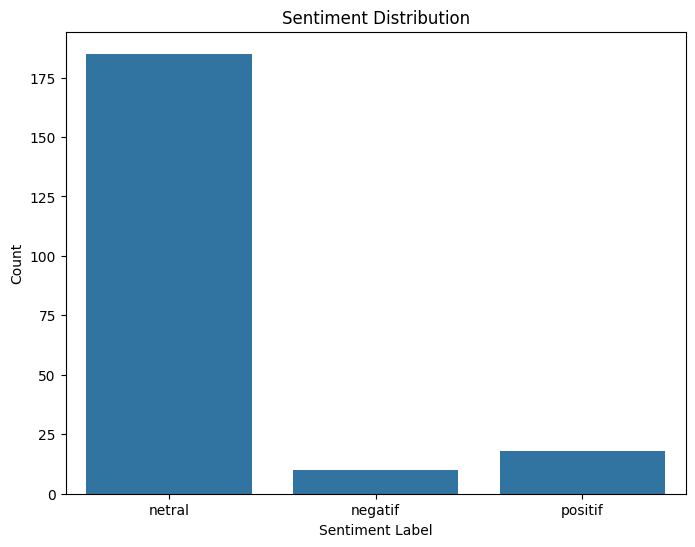

In [28]:
#Membuat grafik plot
import matplotlib.pyplot as plt
import seaborn as sns

# Create the bar chart
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment_label', data=israel)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Label')
plt.ylabel('Count')
plt.show()

Membuat grafik batang untuk menampilkan distribusi label sentimen. Menggunakan sns.countplot() untuk menghitung frekuensi setiap label dalam kolom sentiment_label, lalu menampilkan grafik dengan judul dan label sumbu yang sesuai.

In [29]:
# prompt: Buat word cloud dari setiap kategori

!pip install wordcloud

from wordcloud import WordCloud
import matplotlib.pyplot as plt

Mengimpor `WordCloud` untuk membuat word cloud dan `matplotlib.pyplot` untuk menampilkan grafik. `wordcloud` diinstal terlebih dahulu dengan `!pip install wordcloud`.

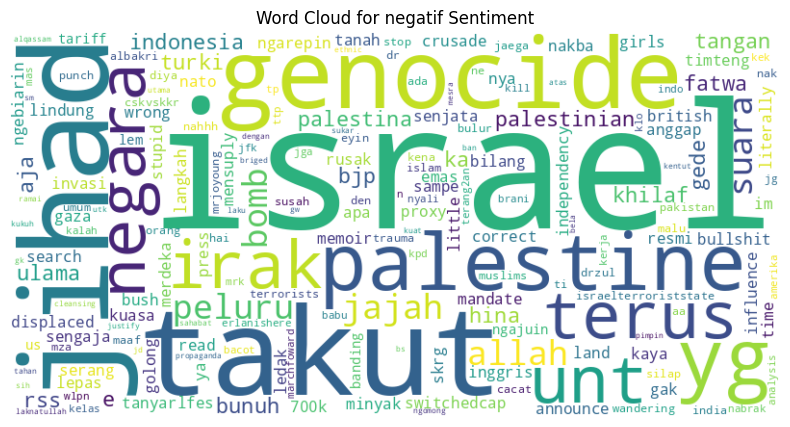

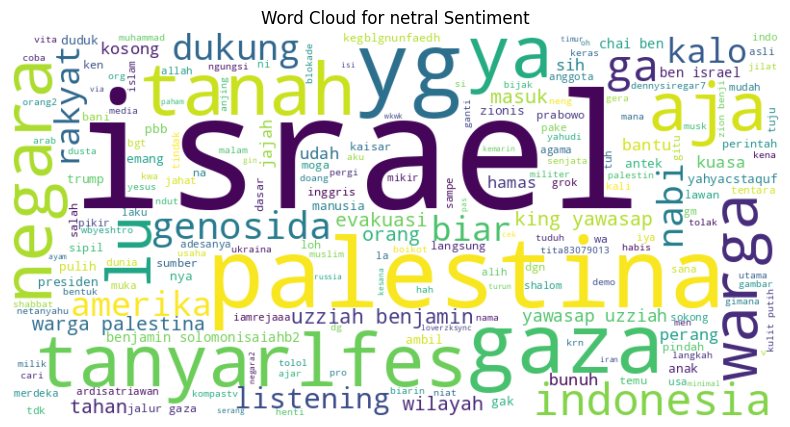

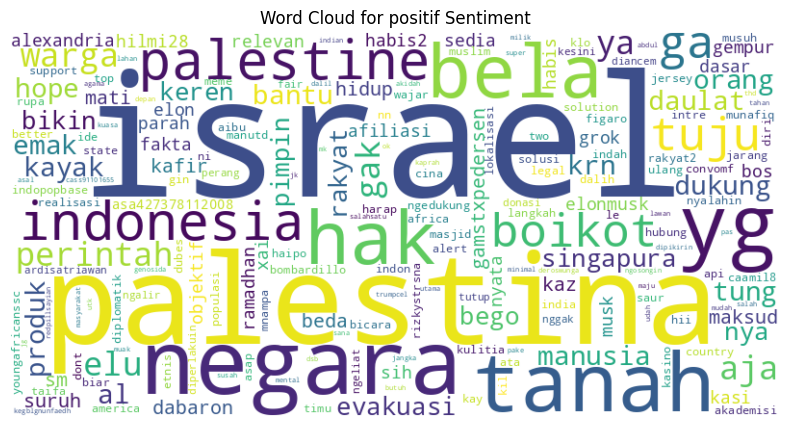

In [30]:
# Group data by sentiment label
sentiment_groups = israel.groupby('sentiment_label')

# Create word clouds for each sentiment category
for sentiment, group in sentiment_groups:
    # Combine all stemmed words in the group
    all_words = ' '.join([' '.join(words) for words in group['stemmed_words']])

    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

    # Display the generated image:
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f'Word Cloud for {sentiment} Sentiment')
    plt.show()

Mengelompokkan data berdasarkan label sentimen, lalu untuk setiap kelompok, menggabungkan kata-kata dan membuat word cloud. Setiap word cloud ditampilkan dengan `matplotlib`.